In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
# Importing the dataset
# must make UTS/Laptop varibales
ws = r"Data\Support Vector Regression (SVR)"
data_file = os.path.join(os.path.join(ws,"data"),'Position_Salaries.csv')
dataset = pd.read_csv(data_file)
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [39]:
# splitting the dataset
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
# y
# array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
#         300000,  500000, 1000000], dtype=int64)

In [6]:
'''
# splitting the dataset into the Training Set and the Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
## must check what random_state does
# X_train
# X_test
# Y_train
# Y_test


# Feature scaling (scale numbers to be represented from range numbers)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)
X_train
# X_test


# Visualising the Training set Result
plt.scatter(X_train, Y_train, color = "red")
# plt.scatter(X_test, Y_test, color = "black")
plt.plot(X_train, regressor.predict(X_train), color = "blue")
plt.title("Salary vs experience (Training set)")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()
'''


'\n# splitting the dataset into the Training Set and the Test set\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)\n## must check what random_state does\n# X_train\n# X_test\n# Y_train\n# Y_test\n\n\n# Feature scaling (scale numbers to be represented from range numbers)\nfrom sklearn.preprocessing import StandardScaler\nsc_x = StandardScaler()\nX_train = sc_x.fit_transform(X_train)\nX_test = sc_x.transform(X_test)\nX_train\n# X_test\n\n\n# Visualising the Training set Result\nplt.scatter(X_train, Y_train, color = "red")\n# plt.scatter(X_test, Y_test, color = "black")\nplt.plot(X_train, regressor.predict(X_train), color = "blue")\nplt.title("Salary vs experience (Training set)")\nplt.xlabel("Years of experience")\nplt.ylabel("Salary")\nplt.show()\n'

In [12]:
# fitting SVR to the dataset
from sklearn.svm import SVR
# help(SVR)
svr_regressor = SVR(kernel = "rbf")
# not linear problem (we know both) (poly and rbf(gaussian) kernel will work)
svr_regressor.fit(X,y) # fitting svr regressor gaussian kernel
svr_regressor.predict(6.5)

array([130001.55760156])

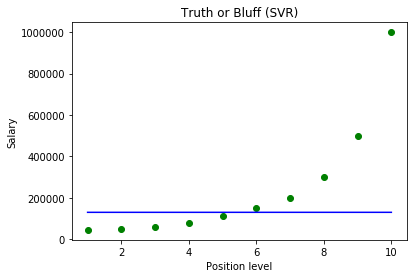

In [13]:
# Visualising the Training set Result
plt.scatter(X, y, color = "green")
# plt.scatter(X_test, Y_test, color = "black")
plt.plot(X, svr_regressor.predict(X), color = "blue")
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

In [71]:
# svr_regressor.predict(7.5) # array([130001.76839523])
# svr_regressor.predict(6.5) # array([130001.55760156])
# SVR class model as a less common model does not auto apply feature scaling
# at SVr models we must apply feature scaling
# must create two objects of scaling coz every object needs it trasform matrix
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_sc = sc_x.fit_transform(X)
Y = [y]
y_sc = sc_y.fit_transform(y[:, np.newaxis])
y_sc[0]
# x_sc
# Must resee
# errors:
#       https://stackoverflow.com/questions/31306390/sklearn-classifier-get-valueerror-bad-input-shape
#       https://github.com/bikz05/object-detector/issues/21
#       https://stackoverflow.com/questions/46555820/sklearn-standardscaler-returns-all-zeros

c:\users\c.r.c\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([-0.72004253])

In [72]:
from sklearn.svm import SVR
# help(SVR)
svr_regressor_scaled = SVR(kernel = "rbf")
# not linear problem (we know both) (poly and rbf(gaussian) kernel will work)
svr_regressor_scaled.fit(x_sc,y_sc) # fitting svr regressor gaussian kernel


c:\users\c.r.c\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

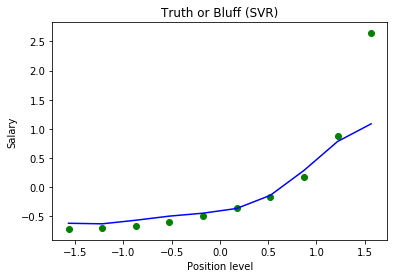

In [73]:
# Visualising the Training set Result
plt.scatter(x_sc, y_sc, color = "green")
# plt.scatter(X_test, Y_test, color = "black")
plt.plot(x_sc, svr_regressor_scaled.predict(x_sc), color = "blue")
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

In [74]:
sc_y.inverse_transform(svr_regressor_scaled.predict(sc_x.transform(np.array([[6.5]]))))
# y_sc[0]

array([170370.0204065])

In [ ]:
'''
# help(SVR)
 |  Parameters
 |  ----------
 |  C : float, optional (default=1.0)
 |      Penalty parameter C of the error term.
 |  
 |  epsilon : float, optional (default=0.1)
 |       Epsilon in the epsilon-SVR model. It specifies the epsilon-tube
 |       within which no penalty is associated in the training loss function
 |       with points predicted within a distance epsilon from the actual
 |       value.
 |  
 |  kernel : string, optional (default='rbf')
 |       Specifies the kernel type to be used in the algorithm.
 |       It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
 |       a callable.
 |       If none is given, 'rbf' will be used. If a callable is given it is
 |       used to precompute the kernel matrix.
 |  
 |  degree : int, optional (default=3)
 |      Degree of the polynomial kernel function ('poly').
 |      Ignored by all other kernels.
 |  
 |  gamma : float, optional (default='auto')
 |      Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
 |      If gamma is 'auto' then 1/n_features will be used instead.
 |  
 |  coef0 : float, optional (default=0.0)
 |      Independent term in kernel function.
 |      It is only significant in 'poly' and 'sigmoid'.
 |  
 |  shrinking : boolean, optional (default=True)
 |      Whether to use the shrinking heuristic.
 |  
 |  tol : float, optional (default=1e-3)
 |      Tolerance for stopping criterion.
 |  
 |  cache_size : float, optional
 |      Specify the size of the kernel cache (in MB).
 |  
 |  verbose : bool, default: False
 |      Enable verbose output. Note that this setting takes advantage of a
 |      per-process runtime setting in libsvm that, if enabled, may not work
 |      properly in a multithreaded context.
 |  
 |  max_iter : int, optional (default=-1)
 |      Hard limit on iterations within solver, or -1 for no limit.
 |  
 |  Attributes
 |  ----------
 |  support_ : array-like, shape = [n_SV]
 |      Indices of support vectors.
 |  
 |  support_vectors_ : array-like, shape = [nSV, n_features]
 |      Support vectors.
 |  
 |  dual_coef_ : array, shape = [1, n_SV]
 |      Coefficients of the support vector in the decision function.
 |  
 |  coef_ : array, shape = [1, n_features]
 |      Weights assigned to the features (coefficients in the primal
 |      problem). This is only available in the case of a linear kernel.
 |  
 |      `coef_` is readonly property derived from `dual_coef_` and
 |      `support_vectors_`.
 |  
 |  intercept_ : array, shape = [1]
 |      Constants in decision function.
 |  
 |  sample_weight : array-like, shape = [n_samples]
 |          Individual weights for each sample

'''
